# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Loading Model Using Pickle Library

In [2]:
with open('C:\\Users\\SHERYAR\\Best.pkl', 'rb') as f:
    model = pickle.load(f)

In [3]:
model

RandomForestClassifier()

# Preparing Data To Evaluate Model Performance

In [15]:
_stg0 = pd.read_csv('C:\\Users\\SHERYAR\\Stage 0.csv',index_col=False)
_stg1 = pd.read_csv('C:\\Users\\SHERYAR\\Stage 1.csv',index_col=False)
_stg1 = _stg1.drop('Unnamed: 0',axis=1)
final_df = pd.concat([_stg0,_stg1],axis=0)

# Testing On Stage 0 Dataset

In [6]:
y_original = _stg1['Stage']
y_predicted = model.predict(_stg1.drop(['Stage','f4'],axis=1))
print(pd.Series(y_predicted).value_counts())

1    450
0      6
Name: count, dtype: int64


# Testing On Stage 1 Dataset

In [7]:
y_original = _stg0['Stage']
y_predicted = model.predict(_stg0.drop(['Stage','f4'],axis=1))
print(pd.Series(y_predicted).value_counts())

0    1170
1       8
Name: count, dtype: int64


# Testing On Stage 2 Dataset

In [18]:
df = pd.read_csv('C:\\Users\\SHERYAR\\Stage 2.csv')
pd.Series(model.predict(df[['f1','f2','f3','f5','f6']])).value_counts()

1    514
0    474
Name: count, dtype: int64

# Testing On Stage 3 Dataset

In [19]:
df = pd.read_csv('C:\\Users\\SHERYAR\\Stage 3.csv')
pd.Series(model.predict(df[['f1','f2','f3','f5','f6']])).value_counts()

0    323
1    171
Name: count, dtype: int64

# Testing On Stage 4 Dataset

In [20]:
df = pd.read_csv('C:\\Users\\SHERYAR\\Stage 4.csv')
pd.Series(model.predict(df[['f1','f2','f3','f5','f6']])).value_counts()

0    156
1     72
Name: count, dtype: int64

# Showing Results Through Confsuion Matrix

In [63]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix


# cm = [[1170, 8],
#       [6, 450]]
# labels = ['Stage 0', 'Stage 1']
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Stage0 and Stage1')
# plt.show()
# print()
# print()
# print()


# cm = [[474, 514]]
# labels = ['Stage 0', 'Stage 1']
# sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=[])
# plt.xlabel('Predicted')
# plt.title('Stage2')
# plt.show()
# print()
# print()
# print()


# cm = [[323, 171]]
# labels = ['Stage 0', 'Stage 1']
# sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=[])
# plt.xlabel('Predicted')
# plt.title('Stage3')
# plt.show()
# print()
# print()
# print()


# cm = [[156, 72]]
# labels = ['Stage 0', 'Stage 1']
# sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=[])
# plt.xlabel('Predicted')
# plt.title('Stage4')
# plt.show()
# print()
# print()
# print()

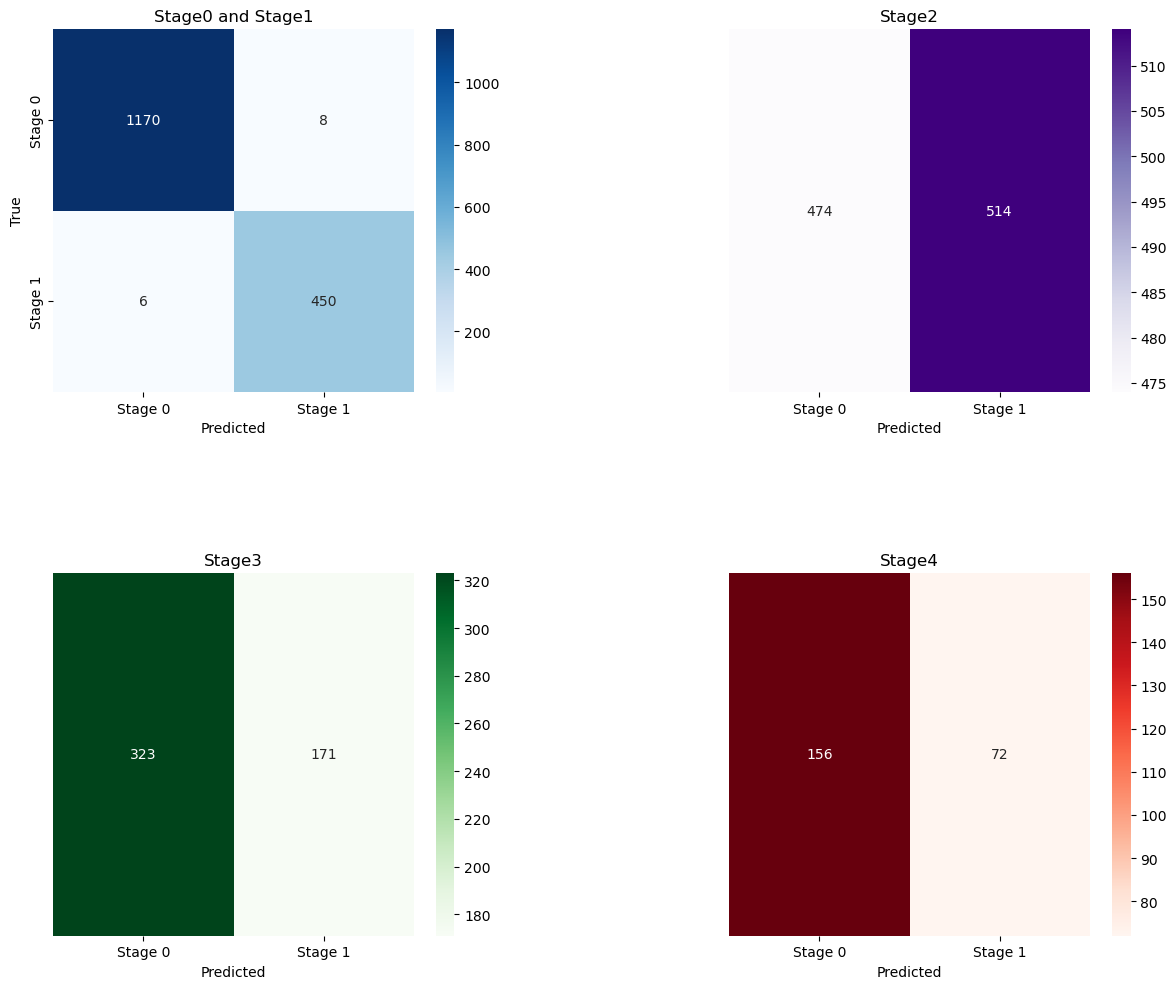

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define confusion matrices and labels
cms = [
    [[1170, 8], [6, 450]],
    [[474, 514]],
    [[323, 171]],
    [[156, 72]]
]
labels = ['Stage 0', 'Stage 1']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot each confusion matrix
for i, (cm, title, cmap) in enumerate(zip(cms, ['Stage0 and Stage1', 'Stage2', 'Stage3', 'Stage4'], ['Blues', 'Purples', 'Greens', 'Reds'])):
    row = i // 2
    col = i % 2
    if title == 'Stage0 and Stage1':
        sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, ax=axes[row, col])
        axes[row, col].set_ylabel('True')
    else:
        sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=[], ax=axes[row, col])
        axes[row, col].set_ylabel('')
    axes[row, col].set_xlabel('Predicted')
#     axes[row, col].set_ylabel('True')
    axes[row, col].set_title(title)

plt.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()
